    **Question (1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**
    



Ans:- The process of matrix multiplication involves a total of (n*k*m) multiplications and (n*(k-1)*m) additions. This computation is based on the requirement that the number of columns in matrix A (k) must be equal to the number of rows in matrix B (k). To illustrate, consider matrices A with dimensions (n, k) and B with dimensions (k, m).

Taking an example:
Let A be [[1,2,...,k],[3,4,...,k],[n,...,k]] and
B be [[1,2,...,m],[3,4,...,m],[k,...,m]].

The multiplication of the first row of matrix A with the first column of matrix B necessitates (k*m) multiplications. Extending this process to n rows results in a total of n*(k*m) multiplications. Similarly, for the addition step, the multiplication of the first row of matrix A with the first column of matrix B requires (k-1)*m additions, and for n rows, n*(k-1)*m additions are required.


**Question (2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy.Compare the timing of both solutions. Which one is faster? Why?**

In [ ]:
#2.


def mul(n,A,B):
    

    
    
    
    
    
    result =[[0 for j in range(n)] for i in range(n)]
    
    for i in range(len(A)): 
        for j in range(len(B[0])): 
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    

        
    
      
        

    


In [ ]:
import random
n=256
A =[[random.randint(-50,50) for x in range(n)] for i in range(n)]
B =[[random.randint(-50,50) for x in range(n)] for i in range(n)]

%timeit mul(n,A,B)

6.62 s ± 532 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:



%timeit np.matmul(A,B)

71.1 ms ± 674 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


..........

for 256*256 matrix python took 6.62 second and numpy took only 71.1 ms .
hence numpy is faster than python result.
because ,

NumPy package divides a task into many pieces, which are then processed concurrently.
Python code written in C, C++, and Fortran is integrated in the NumPy library.Compared to Python,these programming languages execute much faster.

**Question (3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

In [ ]:

def median(array):
    
   
    for i in range(len(array)//2+1):
            max_idx = i

            for j in range(i + 1, len(array)):


                if array[j] > array[max_idx]:
                    max_idx = j


            (array[i], array[max_idx]) = (array[max_idx], array[i])


    #print(array)
    if len(array)%2==1 :
        print(array[len(array)//2])

    else:
        median=(array[len(array)//2]+array[len(array)//2-1])/2
        print(median)
           
              
    

In [ ]:
n=2000
array=[random.randint(-50,10) for x in range(n)]
%timeit median(array)



-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
182 ms ± 5.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Time complexity of these method will be O(n/2*n/2) or O(n*n) where n is length of array .

# Another method : 
we can use median of median algorithm for finding median :
Refrence: https://gist.github.com/boulethao/a15809963d326a5ad43f255fbffbf9ff

The time complexity of this algorithm is O(n) with big constant calculation time . 




In [ ]:
def median_of_medians(arr):
   
    if arr is None or len(arr) == 0:
        return None

    return select_pivot(arr, len(arr) // 2)


def select_pivot(arr, k):
    
    chunks = [arr[i : i+5] for i in range(0, len(arr), 5)]

    #sort each chunks
    sorted_chunks = [sorted(chunk) for chunk in chunks]


    
    medians = [chunk[len(chunk) // 2] for chunk in sorted_chunks]

    
    if len(medians) <= 5:
        pivot = sorted(medians)[len(medians) // 2]
    else:
        pivot = select_pivot(medians, len(medians) // 2)



    
    p = partition(arr, pivot)

    
    if k == p:
        
        return pivot

    if k < p:
        
        return select_pivot(arr[0:p], k)
    else:
        
        return select_pivot(arr[p+1:len(arr)], k - p - 1)


def partition(arr, pivot):
    
    left = 0
    right = len(arr) - 1
    i = 0

    while i <= right:
        if arr[i] == pivot:
            i += 1

        elif arr[i] < pivot:
            arr[left], arr[i] = arr[i], arr[left]
            left += 1
            i += 1
        else:
            arr[right], arr[i] = arr[i], arr[right]
            right -= 1

    return left






In [ ]:
def f(array):
    if len(array)%2 == 1:
        median1 = median_of_medians(array)
        print(median1)

    else:
        median1 = median_of_medians(array)
        median2 = median_of_medians(array[:-1])
        median=(median1 + median2)/2
        print(median)

In [ ]:
%timeit f(array)

-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.

In [ ]:
%timeit np.median(array)

268 µs ± 6.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Comparison 

first approach time required is 182 ms and by median of median time required is 8.38 ms but by numpy median function took only 268 micro seconds.


**Question (4) What is the gradient of the following function with respect to x and y?**



## Question 4

                       
given: $f \big(x,y\big)   =  x^{2}y+y^{3}sin \big(x\big) $

$ Grad \big(f \big(x,y\big) \big) = \frac{\partial f}{\partial x} i +  \frac{\partial f}{\partial y} j $

$ = \frac{\partial   \big( x^{2}y+y^{3}sin \big(x\big)\big) }{\partial x} i + \frac{\partial   \big( x^{2}y+y^{3}sin \big(x\big)\big) }{\partial y} j $  

$ = \big( 2 x y  +  y^{3}cos \big(x\big) \big) i +  \big(x^{2}+ 3 y^{2}sin \big(x\big) \big)  j $





**Question (5). Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [ ]:
## Question 5
import jax
import jax.numpy as jnp
from jax import grad


def f(x, y):
  return (x ** 2)*y + (y**3)*jnp.sin(x)

df_dxy = grad(f, argnums=(0, 1))


x = 1.0
y = 1.0
( df_dxy(x,y))


(DeviceArray(2.5403023, dtype=float32, weak_type=True),
 DeviceArray(3.5244129, dtype=float32, weak_type=True))

**Question (6) Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
##Question 6

from sympy import *
x=symbols('x')
y=symbols('y')


In [ ]:
res1=diff( ((x**2)*y) + ((y**3)*sin(x)), x) 
print(res1)
res1.evalf(subs={x:1.0,y:1.0})


2*x*y + y**3*cos(x)


2.54030230586814

In [ ]:
res2=diff( ((x**2)*y) + ((y**3)*sin(x)), y)
print(res2)
res2.evalf(subs={x:1.0,y:1.0})

x**2 + 3*y**2*sin(x)


3.52441295442369

**Question.(7)  Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**


In [ ]:



import random
marks = {'Maths':random.randint(5,10),
         'English': random.randint(5,10),
        }

students = dict()
for i in range(5):
    students[i+1] = {'Roll number': i+1,
                   'Name': "R"+str(i),
                   'Marks': marks}
branch = dict()
for i in range(3):
    branch["Branch"+str(i+1)] = students

year = dict()
for i in range(2022,2026):
    year[i] = branch

year


{2022: {'Branch1': {1: {'Roll number': 1,
    'Name': 'R0',
    'Marks': {'Maths': 9, 'English': 9}},
   2: {'Roll number': 2, 'Name': 'R1', 'Marks': {'Maths': 9, 'English': 9}},
   3: {'Roll number': 3, 'Name': 'R2', 'Marks': {'Maths': 9, 'English': 9}},
   4: {'Roll number': 4, 'Name': 'R3', 'Marks': {'Maths': 9, 'English': 9}},
   5: {'Roll number': 5, 'Name': 'R4', 'Marks': {'Maths': 9, 'English': 9}}},
  'Branch2': {1: {'Roll number': 1,
    'Name': 'R0',
    'Marks': {'Maths': 9, 'English': 9}},
   2: {'Roll number': 2, 'Name': 'R1', 'Marks': {'Maths': 9, 'English': 9}},
   3: {'Roll number': 3, 'Name': 'R2', 'Marks': {'Maths': 9, 'English': 9}},
   4: {'Roll number': 4, 'Name': 'R3', 'Marks': {'Maths': 9, 'English': 9}},
   5: {'Roll number': 5, 'Name': 'R4', 'Marks': {'Maths': 9, 'English': 9}}},
  'Branch3': {1: {'Roll number': 1,
    'Name': 'R0',
    'Marks': {'Maths': 9, 'English': 9}},
   2: {'Roll number': 2, 'Name': 'R1', 'Marks': {'Maths': 9, 'English': 9}},
   3: {'Rol

**Question (8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [ ]:


import random

class StudentClass:
    def __init__(self, roll, name):
        self.roll = roll
        self.name = name
        self.Marks = {'Hindi': random.randint(5,10),
                      'English': random.randint(5,10)
                     }

class BranchClass:
    def __init__(self, branchName):
        self.branchName = branchName
        self.listOfStudents = list()

    def admit_student(self,student):
        self.listOfStudents.append(student)

class YearClass:
    def __init__(self,yearNumber):
        self.yearNum = yearNumber
        self.branches = list()

    def add_branch(self, branch):
        self.branches.append(branch)



yearList1 = list()
for yr in range(2022, 2026):
    year = YearClass(yr)
    for br in range(1,3):
        branch = BranchClass('Branch'+str(br))
        for rol in range(1,6):
            student = StudentClass(rol, 'R' + str(rol))
            branch.admit_student(student)
        year.add_branch(branch)
    yearList1.append(year)
    
print(yearList1[0].branches[0].listOfStudents[1].roll)
print(yearList1[0].branches[0].listOfStudents[1].name)   
print(yearList1[0].branches[0].listOfStudents[1].Marks)



2
R2
{'Hindi': 10, 'English': 6}
[<__main__.YearClass object at 0x7ff060fd3310>, <__main__.YearClass object at 0x7ff060fd3370>, <__main__.YearClass object at 0x7ff0607ff190>, <__main__.YearClass object at 0x7ff0607ff670>]


**Question (9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

In [2]:


x=np.arange(start=0.5, stop=100, step=0.5)
y=x
y


NameError: name 'np' is not defined

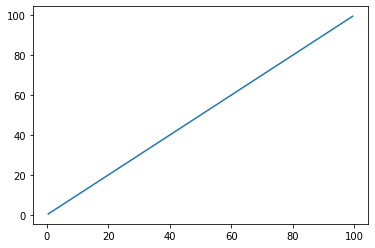

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y, label = "line")
  


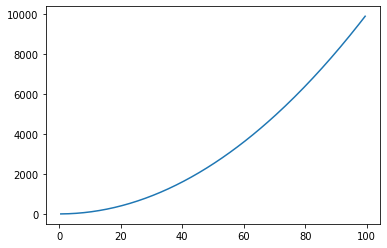

In [ ]:
y2=x*x
y2
plt.plot(x, y2, label = "line")


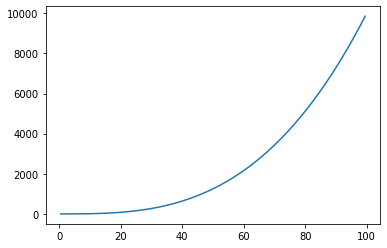

In [ ]:
y3=(x*x*x)/100
y3
plt.plot(x, y3, label = "line")

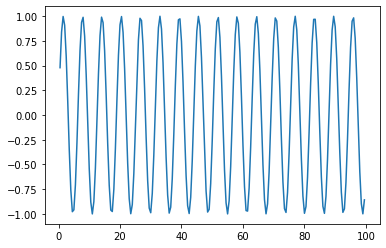

In [ ]:
y4=np.sin(x)
plt.plot(x, y4, label = "line")

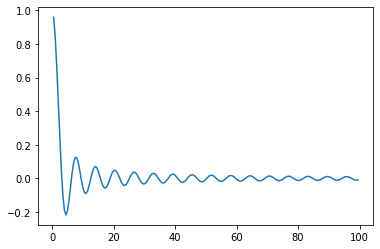

In [ ]:
y5=(np.sin(x))/x
plt.plot(x, y5, label = "line")


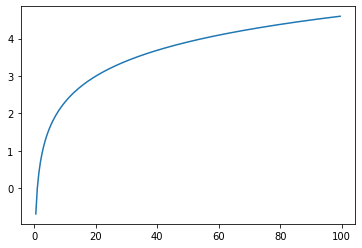

In [ ]:
y6=np.log(x)
plt.plot(x, y6, label = "line")

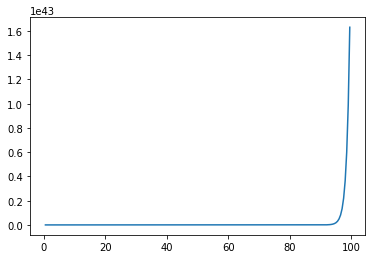

In [ ]:
y7=np.exp(x)
plt.plot(x, y7, label = "line")

**Question (10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**
